In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [13]:
# Load dataset
file_path = "Dataset .csv"
df = pd.read_csv(file_path)

In [14]:
# Display first few rows
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


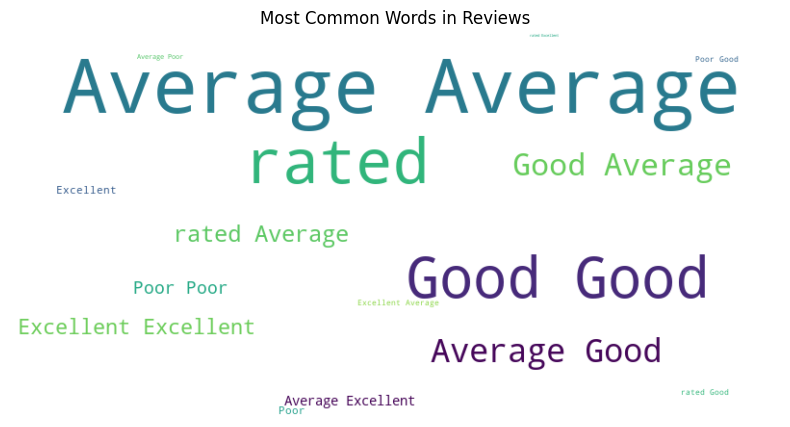

In [15]:
### Task 1: Restaurant Reviews (Word Cloud)
text = " ".join(df['Rating text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Reviews")
plt.show()

In [16]:
### Task 2: Votes Analysis
highest_votes = df.loc[df['Votes'].idxmax()]
lowest_votes = df.loc[df['Votes'].idxmin()]
correlation = df[['Votes', 'Aggregate rating']].corr().iloc[0,1]
print("\nHighest Voted Restaurant:\n", highest_votes[['Restaurant Name', 'Votes']])
print("\nLowest Voted Restaurant:\n", lowest_votes[['Restaurant Name', 'Votes']])
print(f"\nCorrelation between Votes and Ratings: {correlation:.2f}")


Highest Voted Restaurant:
 Restaurant Name     Toit
Votes              10934
Name: 728, dtype: object

Lowest Voted Restaurant:
 Restaurant Name    Cantinho da Gula
Votes                             0
Name: 69, dtype: object

Correlation between Votes and Ratings: 0.31


In [17]:
### Task 3: Price Range vs. Online Delivery & Table Booking
price_vs_delivery = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack()
price_vs_booking = df.groupby('Price range')['Has Table booking'].value_counts(normalize=True).unstack()
print("\nPrice Range vs Online Delivery:\n", price_vs_delivery)
print("\nPrice Range vs Table Booking:\n", price_vs_booking)


Price Range vs Online Delivery:
 Has Online delivery        No       Yes
Price range                            
1                    0.842259  0.157741
2                    0.586894  0.413106
3                    0.708097  0.291903
4                    0.909556  0.090444

Price Range vs Table Booking:
 Has Table booking        No       Yes
Price range                          
1                  0.999775  0.000225
2                  0.923225  0.076775
3                  0.542614  0.457386
4                  0.532423  0.467577
